# **Exploratory Data Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_phones = pd.read_csv("/content/drive/MyDrive/Flipkart_mobile_brands_scraped_data.csv")
df_phones

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0
...,...,...,...,...,...,...,...,...
2642,Xiaomi,Redmi Y3,Bold Red,4 GB,64 GB,4.3,12999.0,13999.0
2643,Xiaomi,Redmi Y3,Elegant Blue,3 GB,32 GB,4.3,9450.0,NaN
2644,Xiaomi,Redmi Y3,Elegant Blue,4 GB,64 GB,4.2,12999.0,NaN
2645,Xiaomi,Redmi Y3,Prime Black,3 GB,32 GB,4.2,9950.0,NaN


In [ ]:
df_phones["Name"] = df_phones["Brand"].astype(str) +" "+df_phones["Model"].astype(str)
df_phones

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,Name
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0,OPPO A53
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0,OPPO A53
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
...,...,...,...,...,...,...,...,...,...
2642,Xiaomi,Redmi Y3,Bold Red,4 GB,64 GB,4.3,12999.0,13999.0,Xiaomi Redmi Y3
2643,Xiaomi,Redmi Y3,Elegant Blue,3 GB,32 GB,4.3,9450.0,NaN,Xiaomi Redmi Y3
2644,Xiaomi,Redmi Y3,Elegant Blue,4 GB,64 GB,4.2,12999.0,NaN,Xiaomi Redmi Y3
2645,Xiaomi,Redmi Y3,Prime Black,3 GB,32 GB,4.2,9950.0,NaN,Xiaomi Redmi Y3


In [ ]:
df_phones.shape

(2647, 9)

In [ ]:
duplicate_rows_df = df_phones[df_phones.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (107, 9)


In [ ]:
df_phones.count()

Brand             2647
Model             2645
Color             2505
Memory            2605
Storage           2568
Rating            2647
Selling Price     2644
Original Price     969
Name              2647
dtype: int64

In [ ]:
df_phones = df_phones.drop_duplicates()
df_phones

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,Name
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0,OPPO A53
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0,OPPO A53
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
...,...,...,...,...,...,...,...,...,...
2642,Xiaomi,Redmi Y3,Bold Red,4 GB,64 GB,4.3,12999.0,13999.0,Xiaomi Redmi Y3
2643,Xiaomi,Redmi Y3,Elegant Blue,3 GB,32 GB,4.3,9450.0,NaN,Xiaomi Redmi Y3
2644,Xiaomi,Redmi Y3,Elegant Blue,4 GB,64 GB,4.2,12999.0,NaN,Xiaomi Redmi Y3
2645,Xiaomi,Redmi Y3,Prime Black,3 GB,32 GB,4.2,9950.0,NaN,Xiaomi Redmi Y3


In [ ]:
df_phones.count()

Brand             2540
Model             2538
Color             2407
Memory            2501
Storage           2463
Rating            2540
Selling Price     2537
Original Price     934
Name              2540
dtype: int64

In [ ]:
print(df_phones.isnull().sum())

Brand                0
Model                2
Color              133
Memory              39
Storage             77
Rating               0
Selling Price        3
Original Price    1606
Name                 0
dtype: int64


In [ ]:
df_phones = df_phones.dropna(subset=["Model", "Memory","Storage"])
df_phones["Selling Price"] = df_phones["Selling Price"].fillna(df_phones["Original Price"])
df_phones["Original Price"] = df_phones["Original Price"].fillna(df_phones["Selling Price"])
df_phones= df_phones.dropna(subset=["Original Price","Selling Price"])
df_phones["Color"] = df_phones["Color"].fillna("Base")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(df_phones.isnull().sum())

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
Name              0
dtype: int64


In [ ]:
df_phones.describe()

,Rating,Selling Price,Original Price
count,2436.000000,2436.000000,2436.000000
mean,4.025041,25524.864943,27507.622742
std,0.928679,28356.236966,30166.558414
min,0.000000,1000.000000,1000.000000
25%,4.000000,9499.000000,9999.000000
50%,4.300000,14999.000000,15999.000000
75%,4.400000,27990.000000,30123.750000
max,5.000000,179900.000000,189999.000000


In [ ]:
df_phones['Selling Price'].mode()

0    9999.0
dtype: float64

In [ ]:
df_phones['Selling Price'].sem()

574.5263541029967

In [ ]:
df_phones['Selling Price'].var()

804076174.8774368

In [ ]:
cv_sell_price = df_phones['Selling Price'].std() / df_phones['Selling Price'].mean()
cv_sell_price

1.110926033494914

In [ ]:
group_name = df_phones["Name"].value_counts(ascending=False)[0:10].reset_index()
group_name.columns = ['Name', 'No. of Variants']
group_name

,Name,No. of Variants
0,Apple iPhone 11,19
1,Apple iPhone XR,18
2,Apple iPhone 12 Mini,18
3,SAMSUNG Galaxy A12,18
4,Apple iPhone 12,18
5,Apple iPhone 11 Pro,16
6,Apple iPhone 6s,16
7,Apple iPhone 7 Plus,16
8,ASUS Zenfone Selfie,16
9,Apple iPhone 7,15


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

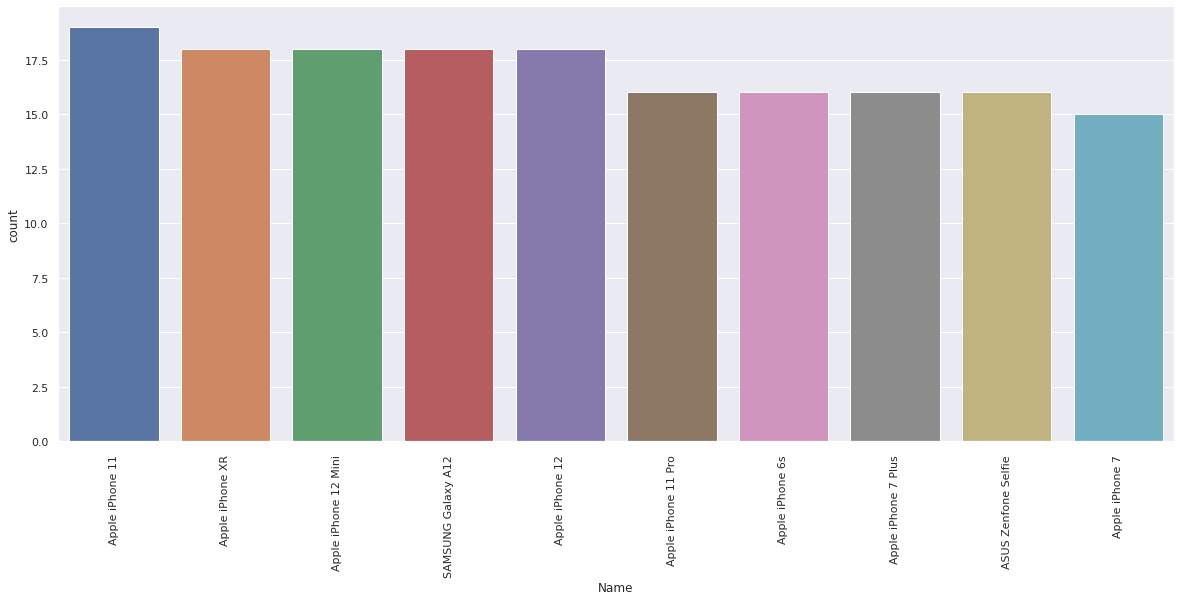

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax=sns.countplot(x="Name", data=df_phones, order=df_phones['Name'].value_counts(ascending = False)[:10].index)
plt.xticks(rotation = 90)

In [ ]:
group_brand = df_phones["Brand"].value_counts(ascending=False)[0:10].reset_index()
group_brand.columns = ['Brand', 'No. of phones']
group_brand

,Brand,No. of phones
0,SAMSUNG,651
1,Apple,283
2,OPPO,240
3,realme,240
4,Nokia,191
5,Xiaomi,164
6,GIONEE,127
7,Lenovo,117
8,ASUS,111
9,Motorola,104


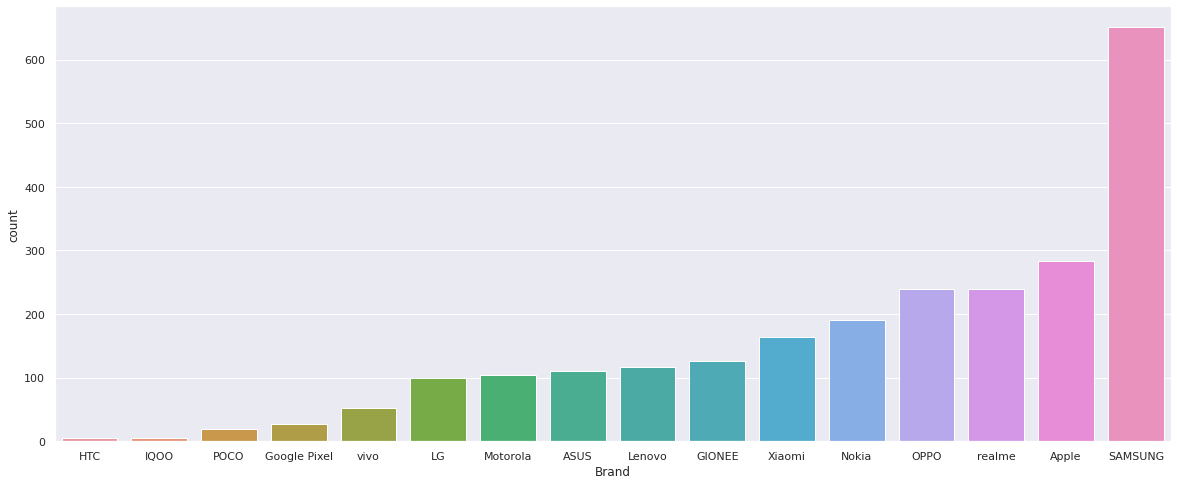

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax=sns.countplot(x="Brand", data=df_phones, order=df_phones['Brand'].value_counts(ascending = True).index)

In [ ]:
group_memory = df_phones["Memory"].value_counts(ascending=False)[0:10].reset_index()
group_memory.columns = ['Memory', 'No. of Phones']
group_memory

,Memory,No. of Phones
0,4 GB,601
1,3 GB,414
2,6 GB,365
3,2 GB,314
4,8 GB,254
5,1 GB,173
6,4GB,90
7,12 GB,40
8,4 MB,38
9,512 MB,33


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

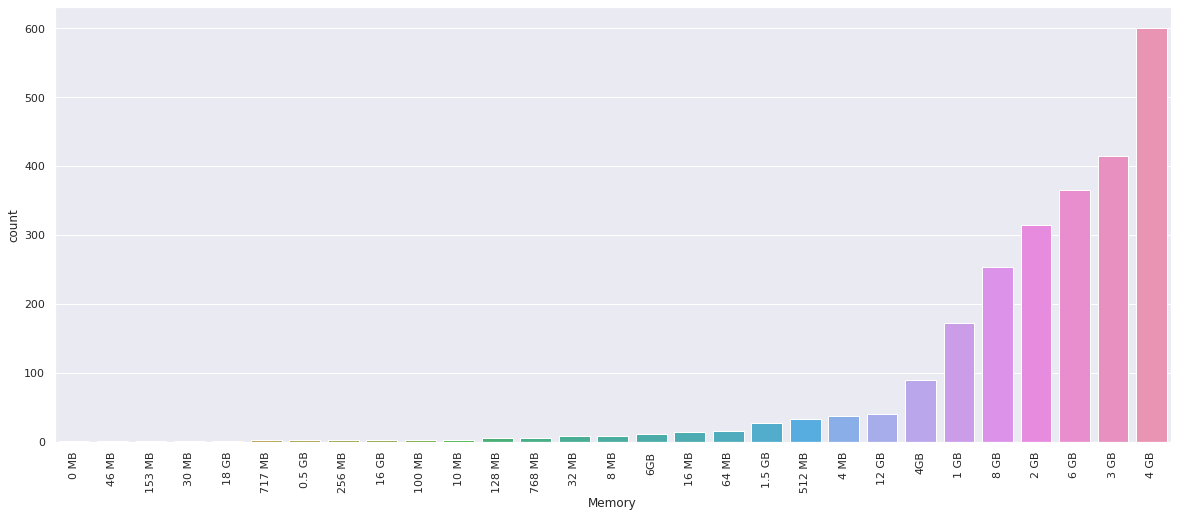

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax=sns.countplot(x="Memory", data=df_phones, order=df_phones['Memory'].value_counts(ascending = True).index)
plt.xticks(rotation = 90)

In [ ]:
group_storage = df_phones["Storage"].value_counts(ascending=False)[0:10].reset_index()
group_storage.columns = ['Storage', 'No. of Phones']
group_storage

,Storage,No. of Phones
0,64 GB,616
1,128 GB,582
2,32 GB,455
3,16 GB,277
4,256 GB,171
5,8 GB,124
6,4 GB,50
7,512 GB,48
8,4 MB,28
9,Expandable Upto 32 GB,12


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

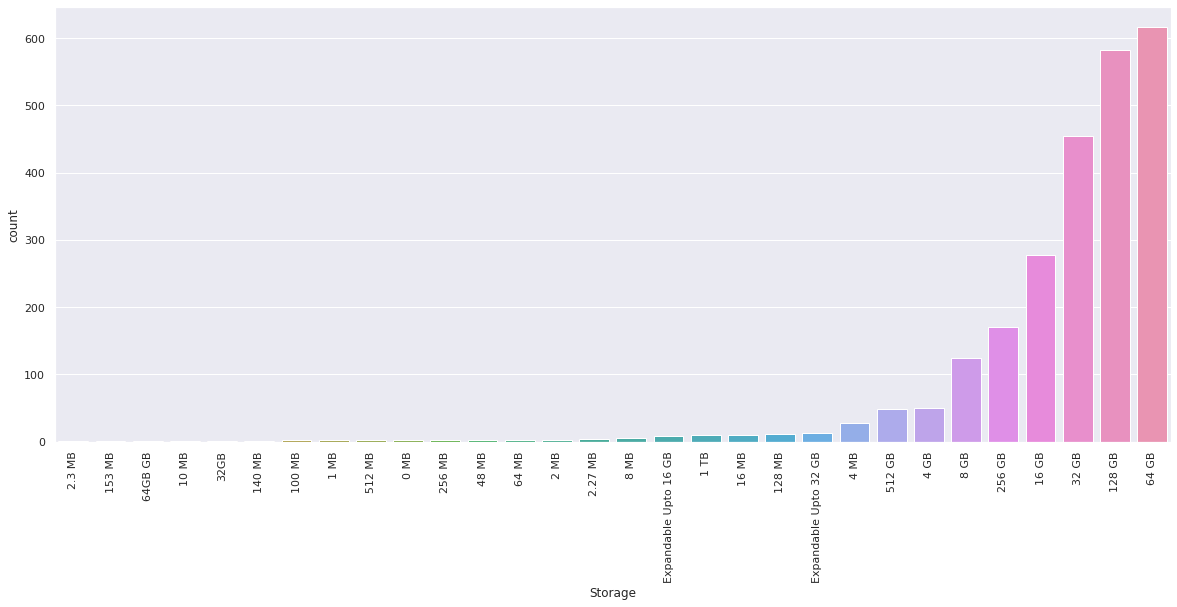

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax=sns.countplot(x="Storage", data=df_phones, order=df_phones['Storage'].value_counts(ascending = True).index)
plt.xticks(rotation = 90)

In [ ]:
group_color = df_phones["Color"].value_counts(ascending=False)[0:10].reset_index()
group_color.columns = ['Color', 'No. of Phones']
group_color

,Color,No. of Phones
0,Black,311
1,Gold,169
2,White,143
3,Blue,129
4,Base,98
5,Silver,86
6,Red,71
7,Grey,32
8,Space Grey,29
9,Rose Gold,28


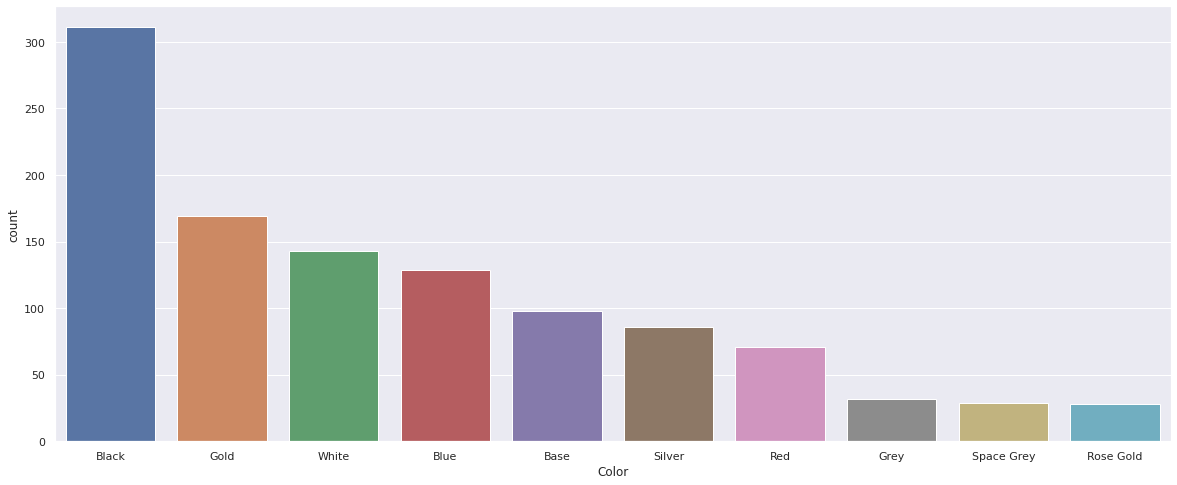

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax=sns.countplot(x="Color", data=df_phones, order=df_phones['Color'].value_counts(ascending = False)[:10].index)

In [ ]:
phone_rating = df_phones.groupby('Brand')[['Rating']].mean().sort_values(ascending=False,by='Rating')[:10].reset_index()
phone_rating

,Brand,Rating
0,Google Pixel,4.514815
1,IQOO,4.400000
2,vivo,4.373077
3,POCO,4.310000
4,OPPO,4.205000
5,Xiaomi,4.150610
6,SAMSUNG,4.145469
7,Motorola,4.062500
8,HTC,4.060000
9,ASUS,4.008108


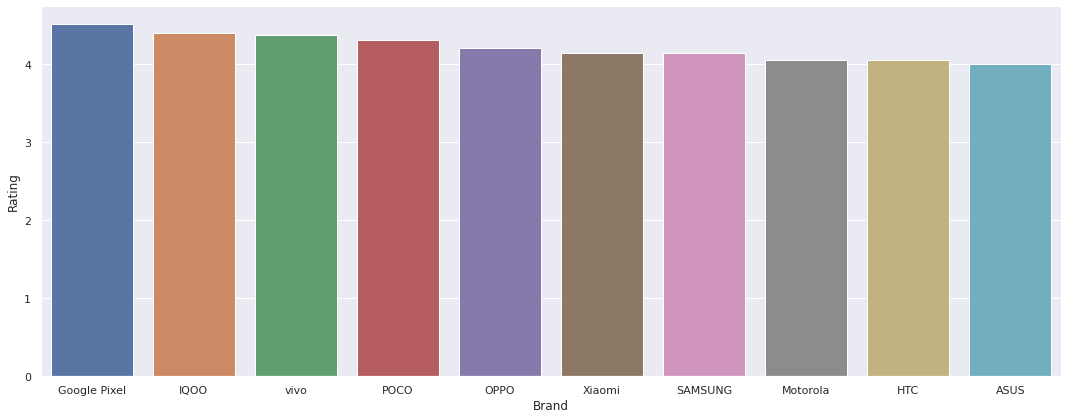

In [ ]:
sns.catplot(x="Brand", y="Rating", kind="bar", data=phone_rating, height=6, aspect=2.5)

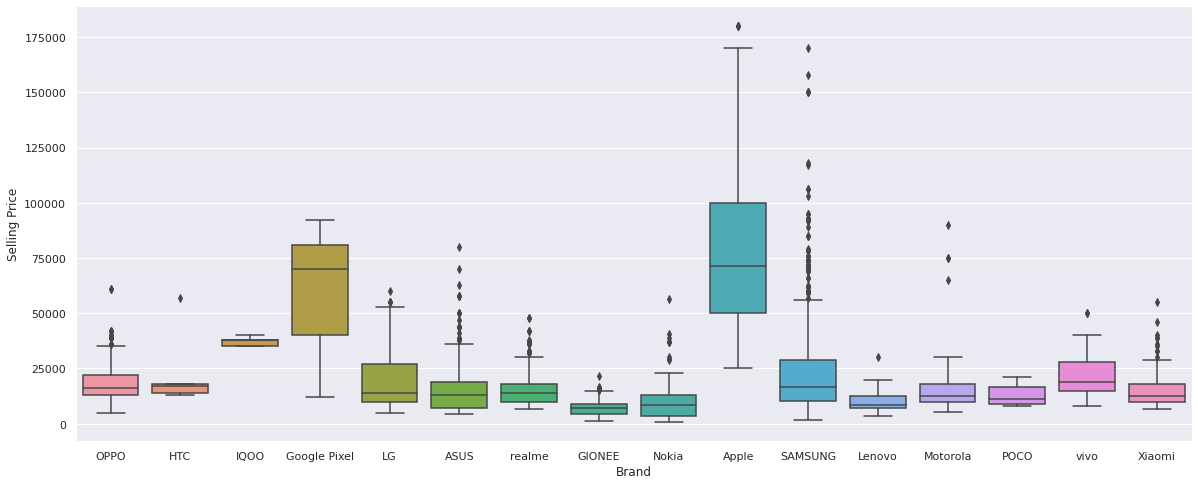

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
sns.boxplot(x="Brand", y="Selling Price", data=df_phones)

In [ ]:
sell_price = df_phones.groupby('Brand')[['Selling Price']].mean().sort_values(ascending=False,by='Selling Price')[:10].reset_index()
sell_price

,Brand,Selling Price
0,Apple,78910.028269
1,Google Pixel,61383.851852
2,IQOO,37190.000000
3,SAMSUNG,24733.596006
4,HTC,23797.200000
5,vivo,21792.884615
6,LG,19323.181818
7,ASUS,18756.684685
8,OPPO,18606.625000
9,Motorola,16370.528846


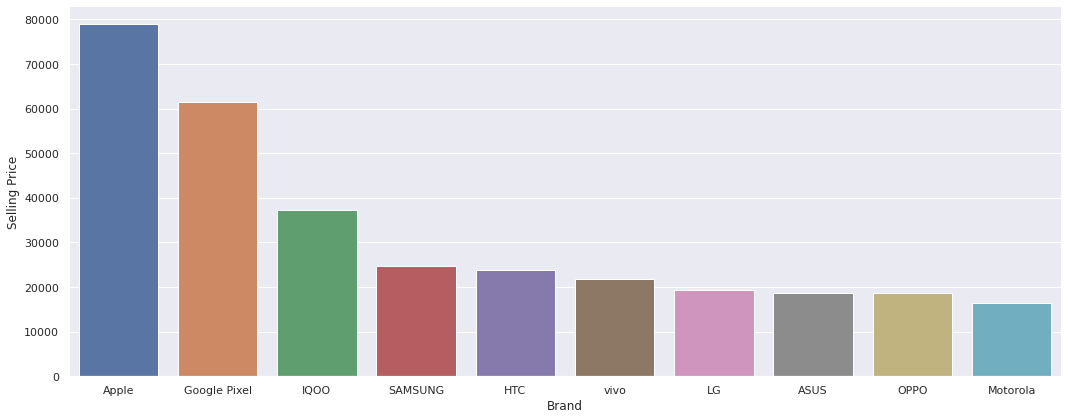

In [ ]:
sns.catplot(x="Brand", y="Selling Price", kind="bar", data=sell_price, height=6, aspect=2.5)

,Rating,Selling Price,Original Price
Rating,1.000000,-0.172306,-0.146712
Selling Price,-0.172306,1.000000,0.982184
Original Price,-0.146712,0.982184,1.000000


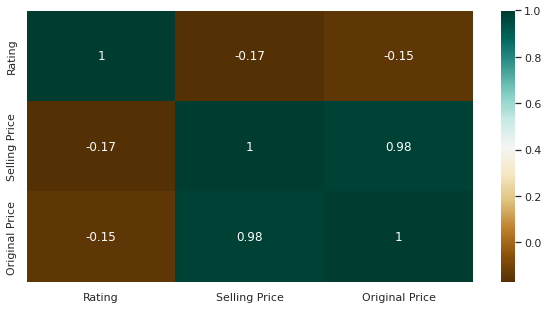

In [ ]:
plt.figure(figsize=(10, 5))
c = df_phones.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

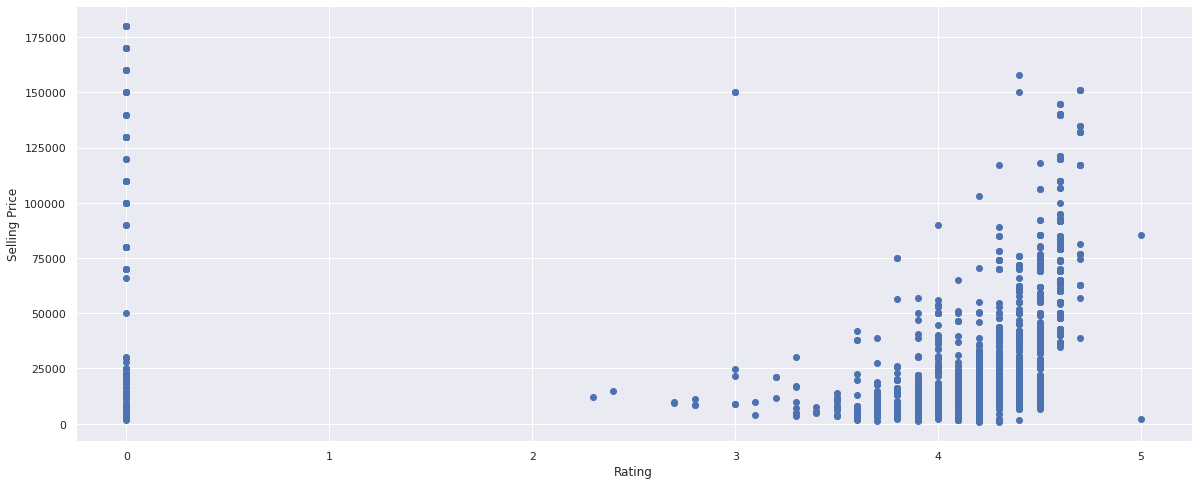

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.scatter(df_phones['Rating'], df_phones['Selling Price'])
ax.set_xlabel('Rating')
ax.set_ylabel('Selling Price')
plt.show()

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text major ticklabel objects>)

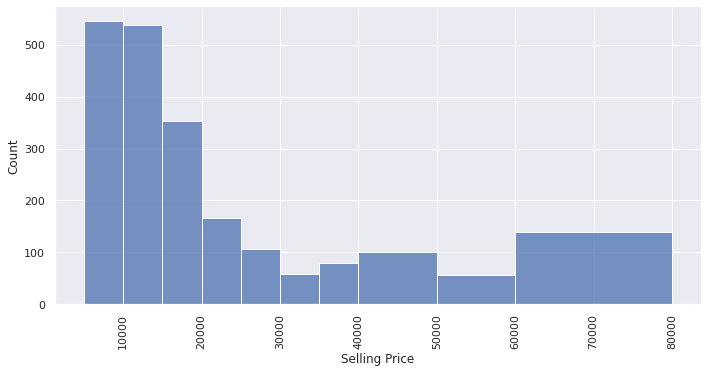

In [ ]:
sns.displot(df_phones, x='Selling Price',bins=[5000,10000,15000,20000,25000,30000,35000,40000,50000,60000,80000], aspect=2)
plt.xticks(rotation = 90)